In [8]:
!pip install ta
!pip install yfinance

In [9]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

Setup of stocks and dates remains same for all the codes

In [11]:
tickers = ["AAPL", "MSFT", "GOOG", "^NSEI"]   # correct NSE Nifty 50 ticker

start_date = "2015-01-01"
end_date = "2025-01-01"


To create Sequences of 21

In [12]:
def create_seq(df, seq_len=21, target_col='Close'):
    values = df.values
    target = df[target_col].values  # target by name
    X, y = [], []
    for i in range(len(df) - seq_len):
        X.append(values[i:i+seq_len])
        y.append(target[i+seq_len])
    return np.array(X), np.array(y)


I have Kept the model as a seperate function, To modularize it if required we can easily replace LSTM with any other model

In [13]:
def build_lstm(input_shape):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        LSTM(50, return_sequences=True),   # first LSTM returns sequences
        Dropout(0.2),
        LSTM(50, return_sequences=False),  # second LSTM outputs last hidden state
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

Run function which will run for all different features

/tmp/ipython-input-189785048.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261049  24.729272  23.821673  24.718176  212818400
2015-01-05  23.577576  24.110152  23.391175  24.030265  257142000
2015-01-06  23.579792  23.839422  23.218083  23.641926  263188400
2015-01-07  23.910431  24.010288  23.677428  23.788382  160423600
2015-01-08  24.829128  24.886824  24.121246  24.238858  237458000
Price        Open   High    Low  Close    MA10     MA50        RSI      MACD  \
Ticker       AAPL   AAPL   AAPL   AAPL                                         
Date                                                                           
2015-03-16  27.60  27.84  27.37  27.84  28.021  26.6130  51.209119  0.215951   
2015-03-17  28.05  28.36  27.99  28.30  27.969  26.6938  55.996125  0.225057   
2015-03-18  28.29  28.77  28.15  28.62  27.967  26.7946  59.009062  0.25

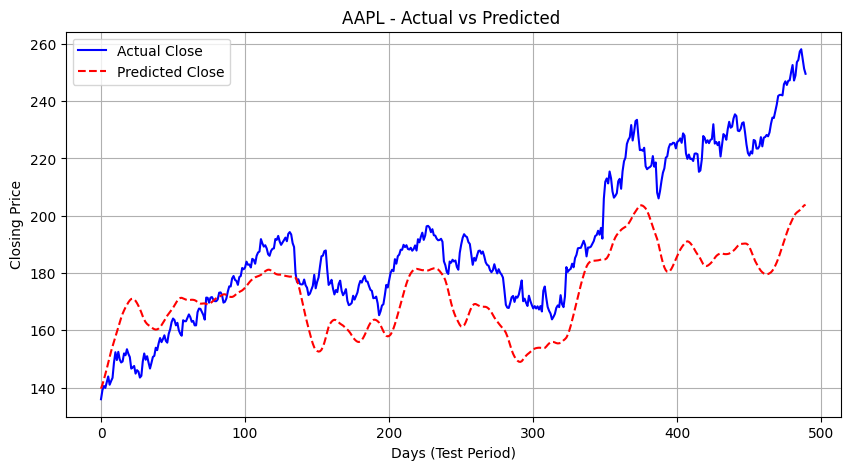

/tmp/ipython-input-189785048.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2015-01-02  39.933056  40.496696  39.745178  39.847657  27913900
2015-01-05  39.565830  39.907428  39.497509  39.599988  39673900
2015-01-06  38.985107  39.924506  38.891167  39.608527  36447900
2015-01-07  39.480446  39.676866  38.848487  39.266946  29114100
2015-01-08  40.641884  40.778524  39.898904  39.924523  29645200
Price        Open   High    Low  Close    MA10     MA50        RSI      MACD  \
Ticker       MSFT   MSFT   MSFT   MSFT                                         
Date                                                                           
2015-03-16  35.67  35.81  35.50  35.74  36.348  37.5998  37.135795 -0.491193   
2015-03-17  35.58  35.98  35.39  35.87  36.213  37.5186  38.930534 -0.493728   
2015-03-18  35.63  36.84  35.55  36.55  36.165  37.4582  47.391234 -0.435843   


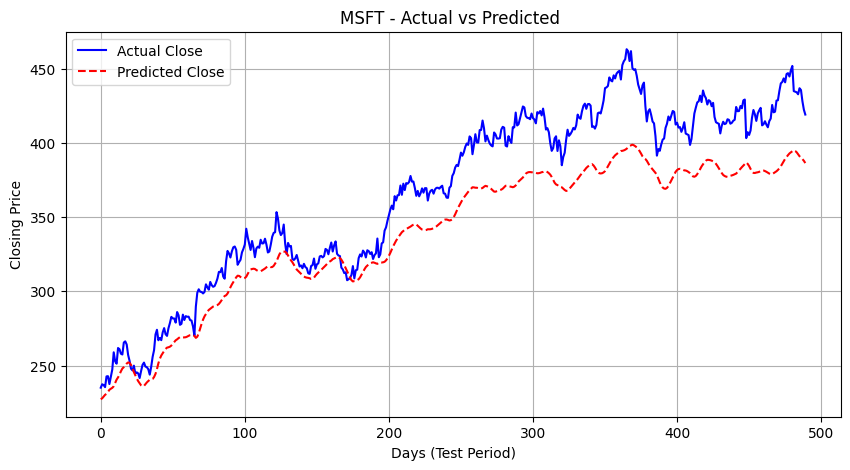

/tmp/ipython-input-189785048.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2015-01-02  26.014023  26.334236  25.978830  26.222210  28951268
2015-01-05  25.471743  25.990229  25.431593  25.937190  41196796
2015-01-06  24.881382  25.585999  24.836276  25.527755  57998800
2015-01-07  24.838757  25.143305  24.766882  25.131210  41301082
2015-01-08  24.917074  24.956729  24.338114  24.684598  67071641
Price        Open   High    Low  Close    MA10     MA50        RSI      MACD  \
Ticker       GOOG   GOOG   GOOG   GOOG                                         
Date                                                                           
2015-03-16  27.31  27.60  27.06  27.49  27.870  26.4334  53.291772  0.303102   
2015-03-17  27.35  27.45  27.16  27.30  27.757  26.4592  50.721714  0.259145   
2015-03-18  27.39  27.75  27.11  27.73  27.688  26.5044  55.904641  0.256054   


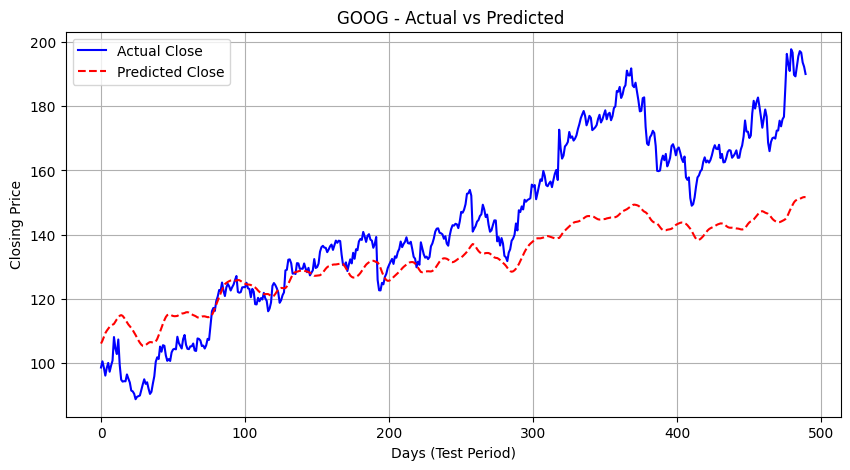

/tmp/ipython-input-189785048.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2015-01-02  8395.450195  8410.599609  8288.700195  8288.700195  101900
2015-01-05  8378.400391  8445.599609  8363.900391  8407.950195  118200
2015-01-06  8127.350098  8327.849609  8111.350098  8325.299805  172800
2015-01-07  8102.100098  8151.200195  8065.450195  8118.649902  164100
2015-01-08  8234.599609  8243.500000  8167.299805  8191.399902  143800
Price          Open     High      Low    Close      MA10      MA50        RSI  \
Ticker        ^NSEI    ^NSEI    ^NSEI    ^NSEI                                  
Date                                                                            
2015-03-17  8689.10  8742.55  8630.80  8723.30  8780.560  8669.167  48.663463   
2015-03-18  8742.90  8747.25  8664.00  8685.90  8749.525  8674.976  46.611629   
2015-03-19  8749.45  8788.2

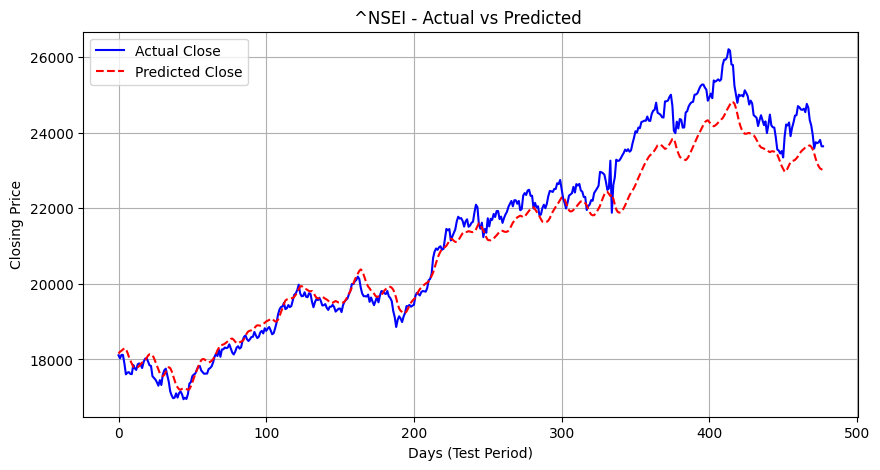

In [14]:
    for ticker in tickers:
      df = yf.download(ticker, start=start_date, end=end_date, progress=False)
      print(df.head())
      # Keep OHLC
      df = df[['Open','High','Low','Close']].round(2).dropna()



      # Moving Averages
      df['MA10'] = df['Close'].rolling(10).mean()
      df['MA50'] = df['Close'].rolling(50).mean()

      # RSI (14-day)
      df['RSI'] = ta.momentum.RSIIndicator(close=df['Close'].iloc[:,0], window=14).rsi()


      # MACD (12,26,9)
      macd = ta.trend.MACD(close=df['Close'].iloc[:,0], window_slow=26, window_fast=12, window_sign=9)
      df['MACD'] = macd.macd()
      df['MACD_Signal'] = macd.macd_signal()

      # ATR (14-day)
      atr = ta.volatility.AverageTrueRange(high=df['High'].iloc[:,0], low=df['Low'].iloc[:,0], close=df['Close'].iloc[:,0], window=14)
      df['ATR'] = atr.average_true_range()

      # Drop NaNs caused by rolling windows
      df = df.dropna()

      print(df.head())
      scaler_X = MinMaxScaler()
      scaled_features = scaler_X.fit_transform(df)
      scaler_y = MinMaxScaler()
      scaled_close = scaler_y.fit_transform(df[['Close']])
      df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)


      X, y = create_seq(df_scaled)
      # After creating X, y
      n = len(X)
      train_end = int(n * 0.7)    # First 70% = training
      val_end   = int(n * 0.80)   # Next 15% = validation
                                  # Last 15% = test
      #chornological splitting of the data
      X_train, y_train = X[:train_end], y[:train_end]
      X_val, y_val     = X[train_end:val_end], y[train_end:val_end]
      X_test, y_test   = X[val_end:], y[val_end:]
      print(f"Datasets: Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")
      model = build_lstm((21, X.shape[2]))
      early_stop = EarlyStopping(
          monitor='val_loss',
          patience=8,
          mode='min',
          restore_best_weights=True
      )

      history = model.fit(
          X_train, y_train,
          validation_data=(X_val, y_val),
          epochs= 50,
          batch_size= 32,
          shuffle=False,
          callbacks=[early_stop],
          verbose=0
      )
      pred_scaled = model.predict(X_test).ravel()
      pred = scaler_y.inverse_transform(pred_scaled.reshape(-1,1)).ravel()
      y_test = scaler_y.inverse_transform(y_test.reshape(-1,1)).ravel()
      rmse = math.sqrt(mean_squared_error(y_test, pred))
      mae = mean_absolute_error(y_test, pred)
      mape = mean_absolute_percentage_error(y_test, pred)
      r2 = r2_score(y_test, pred)
      print(f"{ticker} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}, R2: {r2:.4f}")

      plt.figure(figsize=(10,5))
      plt.plot(y_test, label="Actual Close", color='blue')
      plt.plot(pred, label="Predicted Close", color='red', linestyle='--')
      plt.title(f"{ticker} - Actual vs Predicted ")
      plt.xlabel("Days (Test Period)")
      plt.ylabel("Closing Price")
      plt.legend()
      plt.grid(True)
      plt.show()